In [1]:
import numpy as np
import matplotlib.pyplot as plt
import juanfit
from astropy.io import fits
from astropy.nddata import CCDData
from astropy.visualization import ImageNormalize, SqrtStretch, LogStretch, ZScaleInterval
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord, SpectralCoord
from astropy.wcs.utils import celestial_frame_to_wcs
import astropy.units as u
from sunpy.coordinates.frames import Helioprojective
from ccdproc import ImageFileCollection
from glob import glob
import os
import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter
import dkist
from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
from reproject import reproject_exact, reproject_exact, reproject_interp
import copy
import h5py

In [2]:
CaII_asdf_file = "../src/DKIST/pid_1_118/BJLKB/VBI_L1_20220602T172155_BJLKB.asdf"
Gband_asdf_file = "../src/DKIST/pid_1_118/BKJYA/VBI_L1_20220602T172222_BKJYA.asdf"
Hbeta_asdf_file = "../src/DKIST/pid_1_118/BLKGA/VBI_L1_20220602T172250_BLKGA.asdf"

In [3]:
CaII_merg_file = "../sav/VBI_CaII_merg_test.h5"
Gband_merg_file = "../sav/VBI_Gband_test.h5"
Hbeta_merg_file = "../sav/Hbeta_test.h5"

In [4]:
with h5py.File(CaII_merg_file,"r") as hf:
    CaII_image = hf["vbi_merg"][:]
with h5py.File(Gband_merg_file,"r") as hf:
    Gband_image = hf["vbi_merg"][:]
with h5py.File(Hbeta_merg_file,"r") as hf:
    Hbeta_image = hf["vbi_merg"][:]

In [5]:
ds_CaII = dkist.Dataset.from_asdf(CaII_asdf_file)
ds_Gband = dkist.Dataset.from_asdf(Gband_asdf_file)
ds_Hbeta = dkist.Dataset.from_asdf(Hbeta_asdf_file)

In [6]:
wcs_CaII = copy.deepcopy(WCS(ds_CaII[0,0].headers[0]).celestial)
wcs_CaII.wcs.crpix = 6144.5, 6144.5
wcs_CaII.wcs.crval = -619.0/3600., -413.0/3600.

wcs_Gband = copy.deepcopy(WCS(ds_Gband[0,0].headers[0]).celestial)
wcs_Gband.wcs.crpix = 6144.5, 6144.5
wcs_Gband.wcs.crval = -619.0/3600., -413.0/3600.

wcs_Hbeta = copy.deepcopy(WCS(ds_Hbeta[0,0].headers[0]).celestial)
wcs_Hbeta.wcs.crpix = 6144.5, 6144.5
wcs_Hbeta.wcs.crval = -619.0/3600., -413.0/3600.


Set MJD-BEG to 59732.723557 from DATE-BEG.
Set MJD-AVG to 59732.723557 from DATE-AVG.
Set MJD-END to 59732.723557 from DATE-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    20.706700 from OBSGEO-[XYZ].
Set OBSGEO-H to     3063.997 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set MJD-BEG to 59732.723874 from DATE-BEG.
Set MJD-AVG to 59732.723874 from DATE-AVG.
Set MJD-END to 59732.723874 from DATE-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    20.706700 from OBSGEO-[XYZ].
Set OBSGEO-H to     3063.997 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set MJD-BEG to 59732.724192 from DATE-BEG.
Set MJD-AVG to 59732.724192 from DATE-AVG.
Set MJD-END to 59732.724192 from DATE-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    20.706700 from OBSGEO-[XYZ].
Set OBSGEO-H to     3063.997 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [13]:
fig = plt.figure(figsize=(12,5),constrained_layout=True)

ax1 = fig.add_subplot(1,3,1,projection=wcs_Gband)
ax1.imshow(Gband_image, origin="lower", cmap="Greys_r",vmin=1e4,vmax=6e4)
ax1.set_title(r"\textbf{G-band "+ds_Gband[0,0].headers[5]["DATE-AVG"][10:19] + r"}",fontsize=18)

ax2 = fig.add_subplot(1,3,2,projection=wcs_Hbeta)
ax2.imshow(Hbeta_image, origin="lower", cmap="Greys_r",vmin=1e4,vmax=6e4)
ax2.set_title(r"\textbf{H}$\boldsymbol{\beta}$ \textbf{"+ds_Hbeta[0,0].headers[5]["DATE-AVG"][10:19] + r"}",fontsize=18)

ax3 = fig.add_subplot(1,3,3,projection=wcs_CaII)
ax3.imshow(CaII_image, origin="lower", cmap="Greys_r",vmin=0,vmax=5e4)
ax3.set_title(r"\textbf{Ca \textsc{ii} K"+ds_CaII[0,0].headers[5]["DATE-AVG"][10:19] + r"}",fontsize=18)

for ax_ in (ax1, ax2, ax3):
    ax_.tick_params(labelsize=18,direction="in")
    ax_.set_ylabel(" ")
    ax_.set_xlabel(r"\textbf{SOLAR-X [arcsec]}",fontsize=18)
ax1.set_ylabel(r"\textbf{SOLAR-Y [arcsec]}",fontsize=18)




: 

: 

(array([1.4200000e+02, 4.0500000e+02, 1.0308999e+07, 9.5913826e+07,
        1.2211731e+07, 7.1008000e+04, 7.5840000e+03, 2.9730000e+03,
        1.7460000e+03, 1.1030000e+03]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

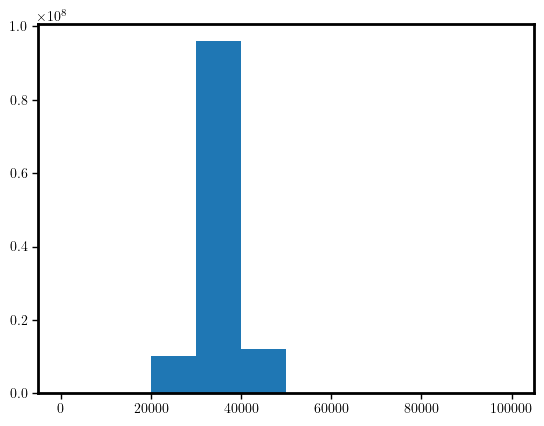

In [12]:
plt.hist(Hbeta_image.flatten(),range=(0,1e5))